# Evaluation and selection of machine learning models

### Róbert Móro, Jakub Ševcech

IAU, 14.11.2019

## Please, give us your feedback here: https://tinyurl.com/iau2019-w08

## You can ask us directly or at http://slido.com#iau2019-w08

# Revision of the last lecture

## Comment from your feedback: Do we make public final exam questions or not?

# Today, we will look at...

what the *curse of dimensionality* is and what we can do about it

what machine learning is and how we can categorize ML approaches

how to systematically evaluate/test ML models and select the best one(s)

what metrics are used to evaluate classifiers

what bias and variance is and what impact they have on ML models

## Last time, we discussed how to transform text into vector representation

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

tfidf_vect = TfidfVectorizer(stop_words='english')
X_train = tfidf_vect.fit_transform(twenty_train.data)
X_train.shape

(2257, 35482)

### Problem: Too many dimensions

## Problem: Too many dimensions

Vectors are usually sparse -> Do we need so many dimensions? *Cannot we compress them somehow?*

Curse of dimensionality - with increasing number of dimensions the space volume also increases; the amount of data needed to fill the space evenly grows exponentially

We cannot visualize more than 3 dimensions

## Dimensionality reduction

The goal is to project $n$-dimensioal space into $p$-dimensional one, while $p < n$, ideally $p \ll n$.

We aim to minimize the information loss.

## Prinicipal Component Analysis, PCA

It aims to compute new uncorrelated coordinates that maintain the most of the variance present in the original data.

<img src="img/basic-pca.png" alt="PCA" style="margin-left: auto; margin-right: auto; width:800px"/>

Source: https://intoli.com/blog/pca-and-svd/

## PCA is based on the singular value decomposition (SVD) of a matrix

<img src="img/svd-matrices.png" alt="SVD" style="margin-left: auto; margin-right: auto; width:700px"/>

Source: https://intoli.com/blog/pca-and-svd/

## PCA used on a matrix of documents and words = Latent Semantic Analysis (LSA)

Alternative name: Latent Semantic Indexing (LSI)

It can be used when computing document similarity, word similarity (latent concepts), document retrieval, etc.

There are more modern (and better) representations, e.g., *pLSA (probabilisitc LSA)* or *LDA (Latent Dirichlet alocation)*.

Look, e.g., here: https://radimrehurek.com/gensim/tut2.html

## First, we need to normalize data

If the features have very different central values or variance, those with large central values (mean) and high variance will have higher weight during the PCA.

Withouth normalization, the weight of features does not reflect their importance, but their scale.

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)

X_scaled = scaler.transform(X_train)

In [3]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(n_components=2)
principal = pca.fit_transform(X_scaled)

principal.shape

(2257, 2)

In [4]:
print(principal)

[[0.66895527 0.17643248]
 [0.37891057 0.30550305]
 [0.59917686 0.48727977]
 ...
 [0.46993716 0.32217643]
 [7.79245704 1.95153923]
 [0.10168885 0.0594885 ]]


In [5]:
pca.components_

array([[7.62492770e-04, 6.75413472e-04, 4.53019308e-04, ...,
        3.05780238e-06, 8.93593091e-06, 2.36402709e-05],
       [2.64424785e-04, 9.77714926e-04, 3.01350019e-04, ...,
        6.82152923e-07, 4.10496052e-06, 2.27621245e-05]])

In [6]:
pca.components_.shape

(2, 35482)

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def plot_pca(components, targets, labels):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1, 1, 1)

    ax.set_xlabel('Principal component 1', fontsize=15)
    ax.set_ylabel('Principal component 2', fontsize=15)
    ax.set_title('Reduction to two dimensions using PCA', fontsize=20)
    ax.set_ylim(ymax=2)
    ax.set_xlim(xmax=2)

    colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))
    for target, color in zip(range(len(labels)), colors):
        ax.scatter(principal[targets == target, 0], principal[targets == target, 1],
                   c=color, s=50, label=labels[target])

    ax.legend()
    ax.grid()

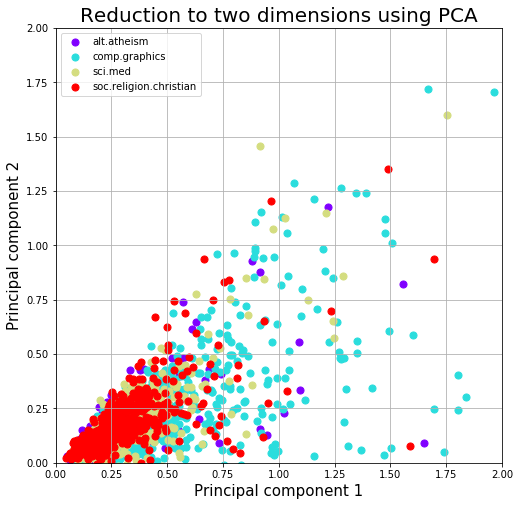

In [8]:
plot_pca(principal, twenty_train.target, twenty_train.target_names)

In [9]:
pca.explained_variance_ratio_

array([0.01720884, 0.01552935])

In [10]:
pca.explained_variance_ratio_.sum()

0.03273819692191189

In [11]:
pca1000 = TruncatedSVD(n_components=1000).fit(X_scaled)

(0, 1)

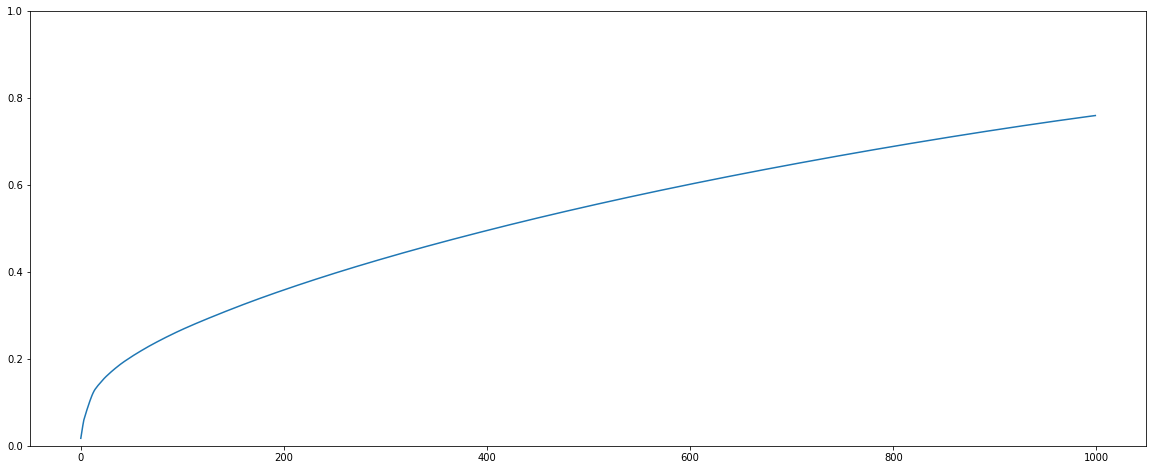

In [12]:
plt.figure(figsize=(20,8))
plt.plot(pca1000.explained_variance_ratio_.cumsum())
plt.ylim((0,1))

## Beware: Dimensionality reduction $\neq$ feature selection

# Biplot

It is a data visualization of two principal components of PCA extended by the explanation of the importance of features represented by the two components.

Example adapted from: https://github.com/teddyroland/python-biplot/blob/master/biplot.py

In [13]:
import seaborn
from sklearn import preprocessing

plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['font.family'] = 'DejaVu Sans'

In [14]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

t_X = scaler.transform(X)

In [17]:
from sklearn.decomposition import PCA

n = t_X.shape[1] # number of columns

pca = PCA(n_components = n)
pca.fit(t_X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
xvector = pca.components_[0]
yvector = pca.components_[1]

xs = pca.transform(t_X)[:,0]
ys = pca.transform(t_X)[:,1]

In [19]:
color_map = {
    0: 'blue',
    1: 'green',
    2: 'red'
}

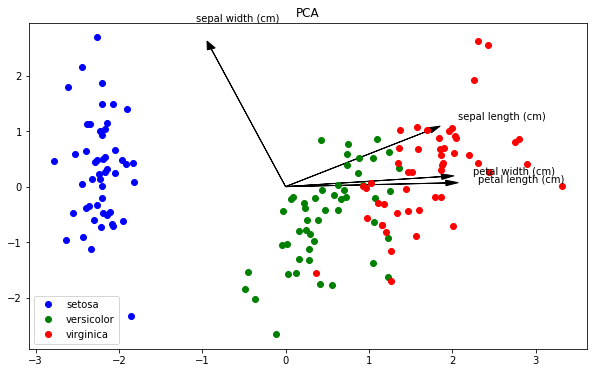

In [20]:
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='black', width=0.0005, head_width=0.1)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             iris.feature_names[i], color='black')

for i in range(len(iris.target_names)):
    plt.plot(xs[y==i], ys[y==i], 'bo', color=color_map[i], label=iris.target_names[i])

plt.legend()
plt.title('PCA')
plt.show()

# What is machine learning?

## We aim to find a function $f$ of attributes $X$ that will predict values of a dependent variable $Y$

$$Y = f(X) + \epsilon$$

$Y$ – dependent variable (response)

$X = (X_1, X_2, ..., X_p)$ – independent variables, features, predictors

$\epsilon$ – error (random noise)

## We do not know $f$, we look for its approximation $f’$

Model error: reducible error

$\epsilon$ – irreducible error

## Example: Flat prices

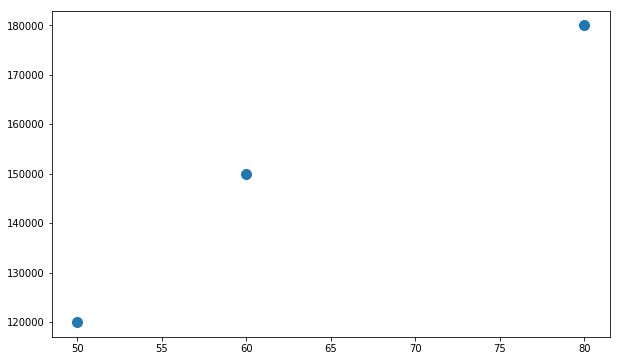

In [21]:
X = np.array([50, 60, 80]) # flat area in m2
y = np.array([120000, 150000, 180000]) # flat price

plt.scatter(X, y, s=100)

In [22]:
def flat_price(X):
    return 40000 + 1780*X

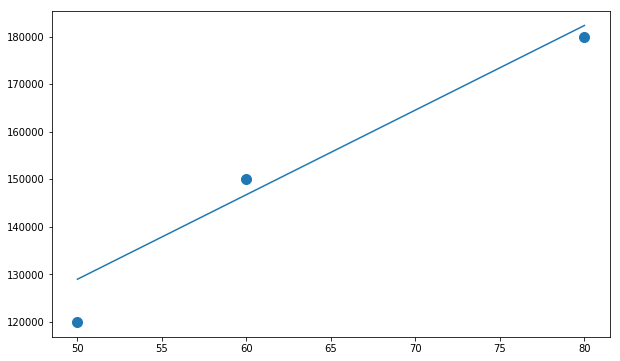

In [23]:
y_est = flat_price(X)

plt.scatter(X, y, s=100)
plt.plot(X, y_est)

## There are many approaches...

<img src="img/MachineLearningAlgorithms.png" alt="Machine Learning Algorithms" style="margin-left: auto; margin-right: auto; width:800px"/>

Source: https://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/

## Typical tasks: Classification vs. regression

### Classification
* Predicted variable is qualitative = categorical (it has a set of values)
* E.g., classification of emails as spam/not spam

### Regression
* Predicted variable is quantitative = numerical (real number from an interval)
* E.g., prediction of flat prices

## Supervised learning vs. unsupervised learning

### Supervised learning
Training examples are labeled (we know to what class they belong, i.e., what the ground truth is)

### Unsupervised learning

Examples are not labeled. We look for relationships, dependencies, clusters, sequences, etc.

## Parametric vs. non-parametric approaches

### Parametric

First, we select a form (model) of $f$ that is described by a finite set of parameters (independent from the amount of data). *Example: linear regression, logistic regression, Naive Bayes.*

### Non-parametric

We do not impose the form of $f$, we let it learn from data. *Example: k-nearest neighbours, decision trees, SVM*

## Generative vs. discriminative (classification) approaches

### Generative
We aim to learn a distribution that generated the data. *E.g.: Naive Bayes*

### Discriminative
We aim to learn a decision boundary, which distinguishes data from different classes. *E.g.: logistic regression, decision trees, SVM*

## There are many approaches, from which we can choose

Even when we limit ourselves to only one approach, it usually has various (hyper)parameters that can be set.

**Fundamental problem of machine learning:** How do we select the best model? How do we assess, how our model will behave on new, unseen data?

## Example: Breast cancer dataset

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [25]:
plt.rcParams['figure.figsize'] = 9, 6

In [26]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [27]:
label_names

array(['malignant', 'benign'], dtype='<U9')

In [28]:
labels[-10:]

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [29]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [30]:
df = pd.DataFrame(features)
df.columns = feature_names
df['target'] = labels
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [31]:
df.shape

(569, 31)

In [32]:
df.target.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

In [33]:
from sklearn.tree import DecisionTreeClassifier

cls = DecisionTreeClassifier()
model = cls.fit(features, labels)

cls.score(features, labels)

1.0

In [34]:
from sklearn.metrics import accuracy_score
preds = model.predict(features)
accuracy_score(labels, preds)

1.0

<img src="img/not-bad.jpg" alt="Not bad... Not bad at all!" style="margin-left: auto; margin-right: auto; width:400px"/>

<img src="img/the-end-or.jpg" alt="The end... Or is it?" style="margin-left: auto; margin-right: auto; width:1000px"/>

In [35]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

In [36]:
cls = DecisionTreeClassifier(random_state=42)
model = cls.fit(train, train_labels)
preds = model.predict(test)

cls.score(train, train_labels)

1.0

In [37]:
cls.score(test, test_labels)

0.9202127659574468

In [38]:
accuracy_score(test_labels, preds)

0.9202127659574468

## Splitting data into train and test set: The foundation of training and evaluation of machine learning models

Data are split *randomly* in certain ratio (e.g., 70:30, 80:20, 90:10).

The resulting accuracy of a trained model is usually lower on a test set. If a difference between accuracy on the train and test sets is large, the model is probably **overfitted**.

## Let us consider the following situation...

We train a model, test it - accuracy of 85%.

We are not satisfied. We modify it, train and test again. The accuracy of a new model (on a test set) is now 86%.

*Which model is better?*

## Leaderboard overfitting

http://blog.kaggle.com/2012/07/06/the-dangers-of-overfitting-psychopathy-post-mortem/

## How can we prevent it?

We split the dat into **train - validation - test sets**. (E.g. 70:20:10)

We train the model on a train set, evaluate it on a validation set. We select the best model based on its performance on a validation set.

The performance on a test set - final estimation of the model's performance on new (unseen) data.

Data are split randomly - there are different results for different (repeated) data splitting.

If we have a lof of data, it is not a problem (the differences will be small).

If we have few data - we use a **cross-validation**.

# Cross-validation

Usually *k-fold*, where k = 5 or 10.

* We split data into *k* parts (folds).
* *k – 1* parts are used for training, the *k*-th for testing
* We repeat *k*-times.

The final error (or performance) estimation is computed as a mean of all cross-validation runs.

In [39]:
from sklearn.model_selection import cross_val_score

cls = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(cls, features, labels, cv=5)
print(scores)
print(scores.mean())

[0.91304348 0.90434783 0.92920354 0.95575221 0.88495575]
0.9174605617545211


{'boxes': [<matplotlib.lines.Line2D at 0x1691a471e10>],
 'caps': [<matplotlib.lines.Line2D at 0x1691a5b89e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1691a5c26a0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1691a5c2278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1691a5b8128>,
  <matplotlib.lines.Line2D at 0x1691a5b85c0>]}

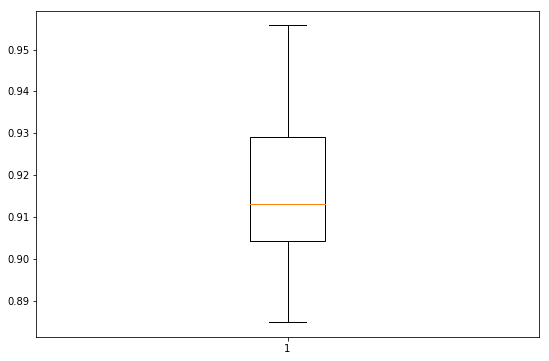

In [40]:
plt.boxplot(scores)

### Special case: Leave-One-Out cross-validation

We train on n – 1 examples and test on the remaining one example.

In [41]:
%%time

from sklearn.model_selection import LeaveOneOut

cls = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(cls, features, labels, cv=LeaveOneOut())
print(scores)
print(scores.mean())

[1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

## Cross-validation trains *k* models. How do we select the one that will be used in production for the actual predictions?

**We do not.** Use cross-validation to find the best model / model settings (model selection, feature selection, hyperparameters optimization). When you do so, train a new model on all available data and use this one in the production.

If you need to estimate its performance on unknown data, test it on a separate test set which was not used during training or validation.

## There are also other means of splitting train and test data

* When we process data incrementally, *test-then-train* approach is used, in which we first use a new observation to evaluate the trained model and then use it to update the model

* If there are dependencies between the observations (temporal, generated by a common process / user), we can split the data so that the dependent observations are together or are evenly split between the sets

# Evaluation metrics

There are many metrics to evaluate classification/regression/clustering... Many of them are available in the scikit library.

http://scikit-learn.org/stable/modules/model_evaluation.html

Toady, we are interested mainly in classification metrics, but all these concepts are also applicable for other data analysis tasks (but the used metrics would be different).

## Evaluation metrics: Classification

![classification metrics](img/metrics.png)

Image source: [https://en.wikipedia.org/wiki/Precision_and_recall](https://en.wikipedia.org/wiki/Precision_and_recall)

![confusion matrix](img/confusion_matrix2.png)

**Accuracy** - how many observations are classified correctly
$$accuracy = \frac{TP + TN}{ALL}$$

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, preds)

array([[ 61,   6],
       [  9, 112]], dtype=int64)

In [43]:
accuracy_score(test_labels, preds)

0.9202127659574468

In [44]:
(61 + 112) / (61 + 6 + 9 + 112)

0.9202127659574468

## Limitations of accuracy

In [45]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA


X, y = make_classification(n_classes=2, class_sep=1, weights=[0.95, 0.05],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=5000, random_state=10)

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

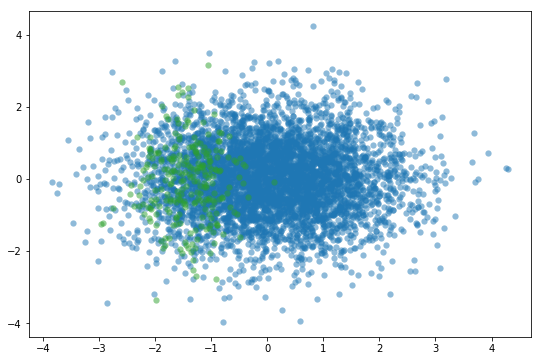

In [46]:
palette = seaborn.color_palette()

plt.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0", alpha=0.5,
            facecolor=palette[0], linewidth=0.15)
plt.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1", alpha=0.5,
            facecolor=palette[2], linewidth=0.15)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

cls = KNeighborsClassifier(3)
model = cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.9586666666666667

In [49]:
accuracy_score(y_test, np.zeros(len(y_pred)))

0.952

**Precision** - how many observations of those classified as a positive class, really belong to the positive class
$$precision = \frac{TP}{TP + FP}$$

**Recall** - how many of all observations that belong to the positive class were classified as belonging to the positive class
$$recall = \frac{TP}{TP + FN}$$

**F1 score**
$$F_1 = \frac{2PR}{P+R}$$

In [50]:
confusion_matrix(y_test, y_pred)

array([[1423,    5],
       [  57,   15]], dtype=int64)

In [51]:
from sklearn.metrics import precision_score

print(precision_score(y_test, y_pred))
print(precision_score(y_test, np.zeros(len(y_pred))))

0.75
0.0


C:\Users\robom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
from sklearn.metrics import recall_score

print(recall_score(y_test, y_pred))
print(recall_score(y_test, np.zeros(len(y_pred))))

0.20833333333333334
0.0


In [53]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred))
print(f1_score(y_test, np.zeros(len(y_pred))))

0.32608695652173914
0.0


C:\Users\robom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## In case of multiple classes, it makes sense to compute metrics for the individual classes (some metrics can be computed only for binary classification case, i.e.,  for a single class or a pair of classes)

![multiclass confusion matrix](img/multi-class-confusionmatrix.png)

$$ precision_A = \frac{TP_A}{TP_A+FP_A} = \frac{TP_A}{TotalPredicted_A} = \frac{30}{60} = 0.5 $$

Recall is computed analogously

If we want to present a single number, we can compute an average value. We can assign different weights to the individual classes, which impacts the resulting number (when we have imbalanced datasets).

* Micro (global for all classes)
* Macro (unweighted average)
* Weighted average (based on the relative class sizes)

If we have an imbalanced dataset and we are also interested in classes, which are not numerous, we usually want to use macro averaging.

In [54]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA


X, y = make_classification(n_classes=3, class_sep=2, weights=[0.9, 0.06, 0.04],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=5000, random_state=10)

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

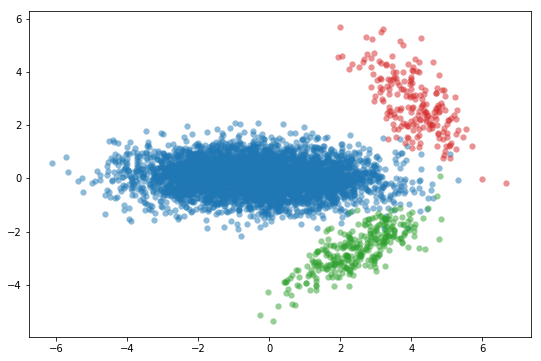

In [55]:
palette = seaborn.color_palette()

plt.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0", alpha=0.5,
            facecolor=palette[0], linewidth=0.15)
plt.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1", alpha=0.5,
            facecolor=palette[2], linewidth=0.15)
plt.scatter(X_vis[y == 2, 0], X_vis[y == 2, 1], label="Class #2", alpha=0.5,
            facecolor=palette[3], linewidth=0.15)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [57]:
from sklearn.neighbors import KNeighborsClassifier

cls = KNeighborsClassifier(3)
model = cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.996

In [58]:
confusion_matrix(y_test, y_pred)

array([[1328,    0,    1],
       [   2,   97,    0],
       [   3,    0,   69]], dtype=int64)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.99625   0.99925   0.99775      1329
           1    1.00000   0.97980   0.98980        99
           2    0.98571   0.95833   0.97183        72

   micro avg    0.99600   0.99600   0.99600      1500
   macro avg    0.99399   0.97913   0.98646      1500
weighted avg    0.99599   0.99600   0.99598      1500



In [60]:
print(precision_score(y_test, y_pred, average='weighted')) # weight is equal to the number of observations in classes
print(precision_score(y_test, y_pred, average='micro')) # global TP, FN and FP is used
print(precision_score(y_test, y_pred, average='macro')) # precision is computed for each class individually and then an unweighted average is computed

0.9959909548815775
0.996
0.9939877826599508


In [61]:
print(precision_score(y_test, np.zeros(len(y_pred)), average='weighted'))
print(precision_score(y_test, np.zeros(len(y_pred)), average='micro'))
print(precision_score(y_test, np.zeros(len(y_pred)), average='macro'))

0.7849959999999999
0.886
0.29533333333333334


C:\Users\robom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\robom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## ROC curve and Area under ROC curve (AUC)

Some classifiers return probability, with which an observation belongs to a class.

We can set a probability decision boundary (default is 50%) - we can influence with it the number of in/correctly classified observations.

## ROC curve and Area under ROC curve (AUC)

True positive rate (Sensitivity) and False positive rate (Specificity) are inter-connected. 
https://en.wikipedia.org/wiki/Sensitivity_and_specificity

If we set a boundary probability of assigning an observation to one class, it influences the probability of assigning it to the other one. Receiver Operating Characteristic (ROC) shows how they change (how inter-connected they are). *We want the area under curve (AUC) to be as large as possible.*

In [62]:
from scipy import interp
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

iris = datasets.load_iris()
X = iris.data
y = iris.target

# classical ROC curve is used only for binary classification; therefore, we will classify to only one class
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Let us add some noise to data
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [63]:
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
probabilities = classifier.fit(X_train, y_train).predict_proba(X_test) # this will get us class probabilities

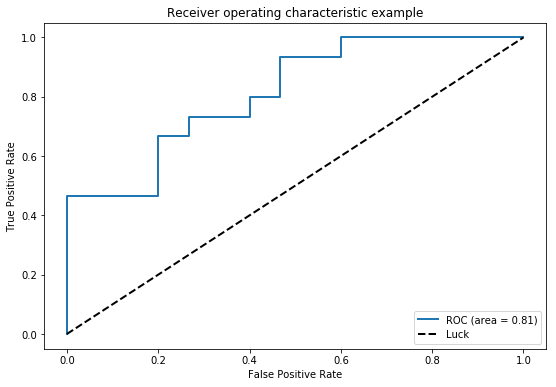

In [64]:
fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1]) # points of ROC curve are computed from the probabilities
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=2, label='ROC (area = %0.2f)' % (roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', # random classifier would have a diagonal line
         label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [65]:
from sklearn.metrics import roc_auc_score
probabilities = classifier.fit(X_train, y_train).predict_proba(X_test)
roc_auc_score(y_test, probabilities[:, 1])

0.8133333333333334

### If we want to modify ROC for cross-validation, we can plot the curve for each fold as well as an average curve

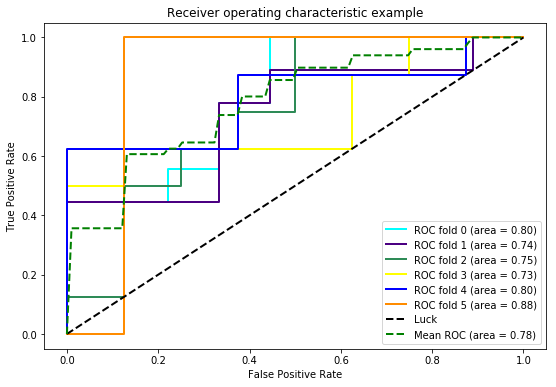

In [66]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=6)
# classifier = KNeighborsClassifier(3)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [67]:
# if we are interested only in the AUC metric, it is very simple to get from cross-validation
roc_auc_scores = cross_val_score(model, X, y, cv=6, scoring='roc_auc')
(roc_auc_scores.mean(), roc_auc_scores.std())

(0.6173964763374485, 0.15214305982630744)

### We can similarly use ROC for multiple classes, even though it is not directly designed for this

In [68]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
n_samples, n_features = X.shape

# Let us add some noise to data
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [69]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
transformed_target = lb.fit_transform(y)
# transformed_target[:,1]

In [70]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
transformed_target[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, transformed_target, test_size=0.3, random_state=0)

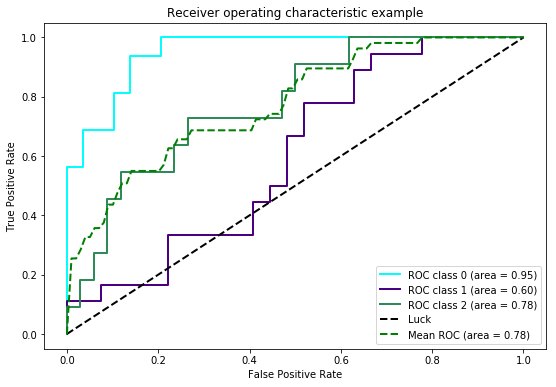

In [73]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
from sklearn.preprocessing import LabelBinarizer

# classifier = KNeighborsClassifier(3)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

lb = LabelBinarizer()
transformed_target = lb.fit_transform(iris.target)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])

for class_index, color in zip(range(len(lb.classes_)), colors):
    (train, test)
    probabilities = classifier.fit(X_train, y_train[:,class_index]).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test[:,class_index], probabilities[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC class %s (area = %0.2f)' % (lb.classes_[class_index], roc_auc))
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck')

mean_tpr /= len(lb.classes_)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

More details on classifiers evaluation and statistical test can be found in this presentation:
http://www.icmla-conference.org/icmla10/CFP_Tutorial_files/jose.pdf

More details on ROC: http://cmp.felk.cvut.cz/~hlavac/TeachPresEn/31PattRecog/13ClassifierPerformance.pdf

### There is also Precison-recall curve, which has similar characteristics as ROC, but instead of sensitivity and specificity, it uses precision and recall. In some domains, this is used more often.

## Model performance as a relationship between bias and variance

*Bias* is an error caused by the approximation of a complex problem by a simpler model.

*Variance* reflects how $f'$ would change if we used a different train set.

## Bias vs. variance

<img src="img/bias-variance.png" alt="Bias vs. variance" style="margin-left: auto; margin-right: auto; width:600px"/>

Zdroj: Domingos, Pedro. 2012. “A Few Useful Things to Know about Machine Learning.” Communications of the ACM 55 (10): 78. https://doi.org/10.1145/2347736.2347755.

## Underfitting vs. overfitting

![overfit](img/overfit.png)

* If we have a high bias, it means that we have an underfitted model and there is something missing
* If we have a high variance, it indicates an overfitted model

Image source: https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted

## The overall error is composed of variance and bias

We cannot separate one from the other, but we want to find a point that minimizes both

![bias-variance](img/bias-variance2.png)

Source: http://scott.fortmann-roe.com/docs/BiasVariance.html

## We aim to find model complexity that minimizes the error on unseen data

![validation error](img/validation-error.png)


Source: http://puremonkey2010.blogspot.sk/2016/09/ml-bias-variance-and-overfitting.html

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# We split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=4)

print('# train data: ', len(X_train))
print('# test data: ', len(X_test))

# train data:  455
# test data:  114


In [75]:
results = []
for i in range(1, X_train.shape[1] + 1):  
    row = {'model_complexity': i}
    # We train a decision tree
    clf = DecisionTreeClassifier(max_depth = i) # tree with a miximal depth of 1-number of attributes, we simulate model complexity this way
    
    pred = clf.fit(X_train, y_train).predict(X_train) # We train a model and do the predictions on the train set
    row['train'] = 1-accuracy_score(y_train, pred) # Error on the training set
    
    pred = clf.predict(X_test)
    row['test'] = 1-accuracy_score(y_test, pred) # Error on the test set
    results.append(row)

In [76]:
complexity_df = pd.DataFrame(results)
complexity_df.head()

,model_complexity,test,train
0,1,0.140351,0.065934
1,2,0.131579,0.052747
2,3,0.122807,0.021978
3,4,0.114035,0.017582
4,5,0.096491,0.008791


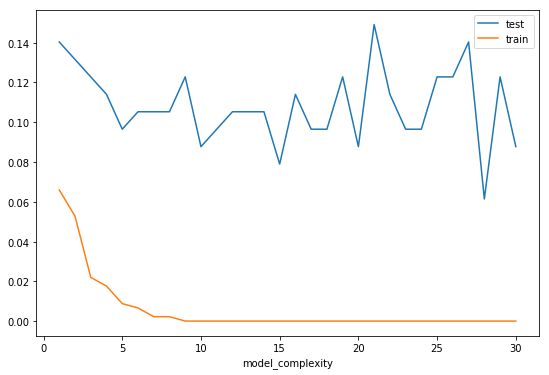

In [77]:
complexity_df.plot(x='model_complexity')

If the error on the train set does not decrease with an increasing model complexity, it indicates that the model is overfitted. It learned the data, not the relationships. If we try to predict on new data, we will observe a larger error caused by the variance.

## Variance and bias can be controlled by the amount of data

* we add additional training data
* we add additional features (and thus increase model complexity)

## The main take-aways from the today's lecture

If we wan to evaluate machine learning models, we need:
* suitable metrics
* suitable methodology of testing / evaluation

We aim to select the best model and prevent the **overfitting**.

## Please, give us your feedback here: https://tinyurl.com/iau2019-w08